# Project 5: Credit Card Anomaly Detection

## Dataset: 

Credit Card Fraud Detection Dataset (available from Kaggle or UCI Machine Learning Repository)

## Analysis Goals:

1. Data Understanding:
    - Explore the structure and contents of the Credit Card Fraud Detection Dataset, including features related to credit card transactions.
    - Understand the distribution of data points and the prevalence of fraudulent transactions compared to legitimate ones.

2. Data Preprocessing:
    - Handle missing values using appropriate techniques such as imputation or dropping.
    - Normalize numerical features using StandardScaler or MinMaxScaler to ensure uniform scale across features.

3. Feature Selection:
    - Explore feature importance using techniques like:
        - Correlation analysis
        - Feature importance scores from models like Random Forest.
    - Select relevant features for anomaly detection, focusing on those most indicative of fraudulent transactions.

4. Model Building:
    - Choose appropriate anomaly detection algorithms such as Isolation Forest, One-Class SVM, or autoencoders.
    - Train the selected models on the preprocessed data.

5. Model Evaluation:
    - Evaluate model performance using metrics such as precision, recall, and F1-score.
    - Use techniques like cross-validation or train-test splits to ensure robust evaluation of the models.
    - Visualize anomalies detected in the data and compare them against ground truth labels (if available).

6. Analysis of Results:
    - Examine detected anomalies to understand common patterns or characteristics indicative of fraudulent transactions
    - Assess the effectiveness of different anomaly detection algorithms and identify areas for improvement.

## Analysis

### Load Data

| Column Name | Description                                                                                   |
|-------------|-----------------------------------------------------------------------------------------------|
| Time        | Number of seconds elapsed between this transaction and the first transaction in the dataset   |
| V1-V28      | These may be the result of PCA Dimensionality reduction to protect user identities and sensitive features |


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/creditcard.csv')

df.head()

y = df['Class']
print(np.unique(y))
X = df.drop(columns=('Class'))
print(X.columns)
print(df.columns)
X.head()

[0 1]
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Data Understanding

In [2]:
# 1. Explore the structure of the dataset
print("Number of rows and columns:", df.shape)
print("Data types of each column:")
print(df.dtypes)

Number of rows and columns: (284807, 31)
Data types of each column:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [3]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1

In [4]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# 2. Examine the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# 3. Understand the features
print("Column names (features):")
df.columns

Column names (features):


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# 4. Check for class imbalance
fraudulent_count = df['Class'].sum()
total_transactions = len(df)
print("Number of fraudulent transactions:", fraudulent_count)
print("Number of legitimate transactions:", total_transactions - fraudulent_count)
print("Percentage of fraudulent transactions:", (fraudulent_count / total_transactions) * 100, "%")

Number of fraudulent transactions: 492
Number of legitimate transactions: 284315
Percentage of fraudulent transactions: 0.1727485630620034 %


### Data Preprocessing

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Handle missing values
# For simplicity, let's fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Alternatively, to drop rows with missing values:
# X_imputed = X.dropna()

# 2. Normalize numerical features
scaler = StandardScaler()
# Select only numerical columns for normalization (assuming all other columns are categorical or already normalized)
numerical_cols = X_imputed.select_dtypes(include=['float64', 'int64']).columns
X_normalized = X_imputed.copy()
X_normalized[numerical_cols] = scaler.fit_transform(X_imputed[numerical_cols])

# Display the first few rows of the preprocessed DataFrame
print("First few rows of the preprocessed DataFrame:")
print(X_normalized.head())


First few rows of the preprocessed DataFrame:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011 -0.220123   

        V24       V25 

### Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation analysis
correlation_matrix = X_normalized.corrwith(y)
correlation_matrix = correlation_matrix.abs().sort_values(ascending=False)
print("Correlation with target variable (absolute values):")
print(correlation_matrix)

Correlation with target variable (absolute values):
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
dtype: float64


In [15]:
# 2. Feature importance scores from Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

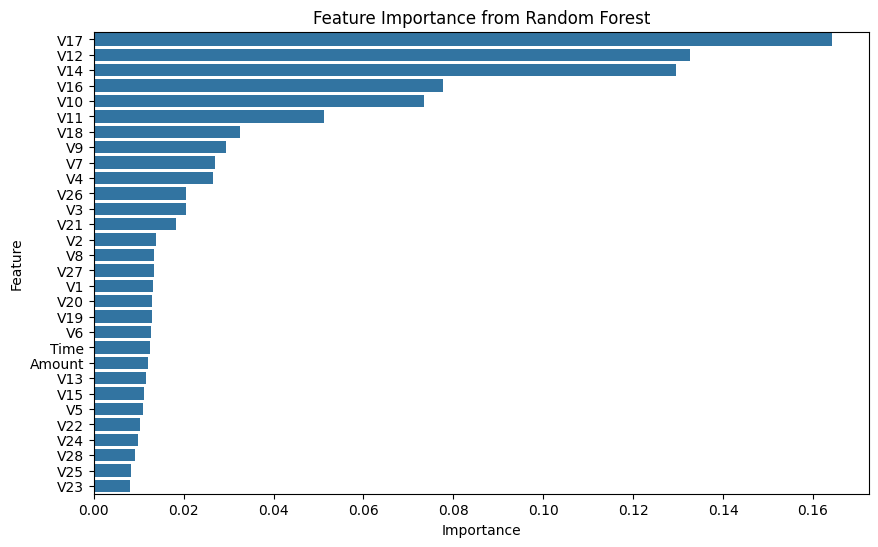

In [17]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [18]:
# Select relevant features based on correlation or feature importance scores
# You may choose a threshold for selecting features based on correlation or importance scores
# For example, select features with absolute correlation greater than 0.1 or importance scores above a certain threshold
relevant_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()
print("Relevant features:", relevant_features)

Relevant features: ['V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V18', 'V9', 'V7', 'V4', 'V26', 'V3', 'V21', 'V2', 'V8', 'V27', 'V1', 'V20', 'V19', 'V6', 'Time', 'Amount', 'V13', 'V15', 'V5', 'V22']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define class weights
class_weight = {0: 1, 1: 100}  # Penalize misclassifications of the minority class more heavily

# Train Random Forest with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weight, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score

# Train Isolation Forest
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train)

# Predict anomalies on the test set
y_pred = isolation_forest.predict(X_test)

# Convert predictions to binary labels: 1 for anomaly, 0 for normal
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Calculate evaluation metrics
precision_if = precision_score(y_test, y_pred_binary)
recall_if = recall_score(y_test, y_pred_binary)
f1_if = f1_score(y_test, y_pred_binary)
conf_matrix_if = confusion_matrix(y_test, y_pred_binary)

In [52]:
# Create DataFrames for both models
data_if = {
    'Model': ['Isolation Forest'],
    'Precision': [precision_if],
    'Recall': [recall_if],
    'F1-score': [f1_if]
}
data_rf = {
    'Model': ['Random Forest'],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1-score': [f1_rf]
}
metrics_df_if = pd.DataFrame(data_if)
metrics_df_rf = pd.DataFrame(data_rf)

# Combine DataFrames
results = pd.concat([metrics_df_if, metrics_df_rf], ignore_index=True)
results.head()

,Model,Precision,Recall,F1-score
0,Isolation Forest,0.036552,0.826531,0.070009
1,Random Forest,0.986842,0.765306,0.862069


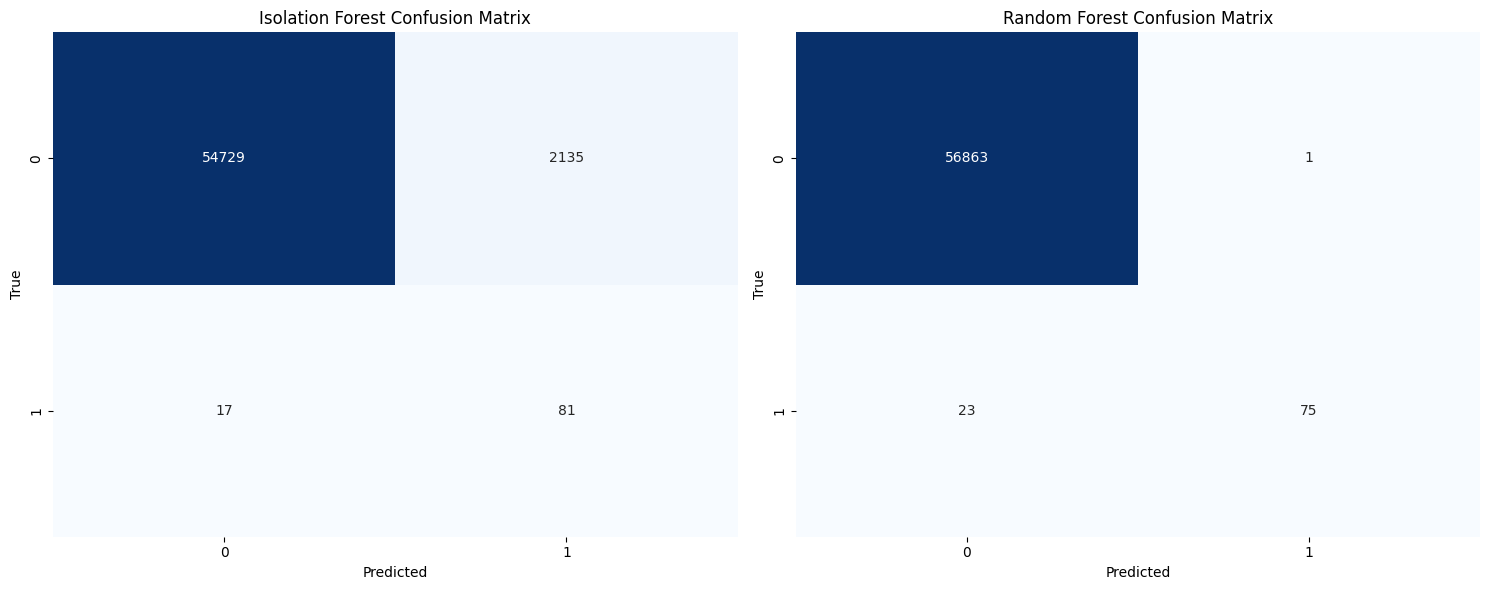

Comparison of Evaluation Metrics:
              Model  Precision    Recall  F1-score
0  Isolation Forest   0.036552  0.826531  0.070009
1     Random Forest   0.986842  0.765306  0.862069


In [53]:
# Plot confusion matrices side by side
plt.figure(figsize=(15, 6))

# Plot Isolation Forest confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_if, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Isolation Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot Random Forest confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Display comparison of evaluation metrics
print("Comparison of Evaluation Metrics:")
print(pd.concat([metrics_df_if, metrics_df_rf], ignore_index=True))

1. Precision: Random Forest achieved a significantly higher precision (98.68%) compared to Isolation Forest (3.66%). This indicates that Random Forest has a much lower false positive rate, meaning it's better at correctly identifying normal transactions. Isolation Forest, on the other hand, has a much higher false positive rate, leading to a lower precision.

2. Recall: Isolation Forest achieved a higher recall (82.65%) compared to Random Forest (76.53%). This indicates that Isolation Forest is better at capturing fraudulent transactions, resulting in fewer false negatives.

3. F1-score: Random Forest achieved a higher F1-score (86.21%) compared to Isolation Forest (7.00%). The F1-score combines precision and recall into a single metric. Although Random Forest has a higher F1-score, it's important to note that it achieves this through higher precision rather than recall. Isolation Forest, despite having a lower F1-score, achieves a higher recall.

In summary, if the goal is to minimize false positives and prioritize precision, the Random Forest model may be preferred. However, if the goal is to capture as many fraudulent transactions as possible and prioritize recall, the Isolation Forest model may be more suitable. Ultimately, the choice between these models depends on the specific objectives and constraints of the credit card anomaly detection task.